<a href="https://colab.research.google.com/github/Tanish-Jha/healthcare/blob/main/Healthcare4_0ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/HealthCare 4.0/large_data.csv')

In [ ]:
data_info=data.info()
data_head=data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44453 entries, 0 to 44452
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 44453 non-null  int64 
 1   MUSCLE_ACHES          44453 non-null  int64 
 2   TIREDNESS             44453 non-null  int64 
 3   SORE_THROAT           44453 non-null  int64 
 4   RUNNY_NOSE            44453 non-null  int64 
 5   STUFFY_NOSE           44453 non-null  int64 
 6   FEVER                 44453 non-null  int64 
 7   NAUSEA                44453 non-null  int64 
 8   VOMITING              44453 non-null  int64 
 9   DIARRHEA              44453 non-null  int64 
 10  SHORTNESS_OF_BREATH   44453 non-null  int64 
 11  DIFFICULTY_BREATHING  44453 non-null  int64 
 12  LOSS_OF_TASTE         44453 non-null  int64 
 13  LOSS_OF_SMELL         44453 non-null  int64 
 14  ITCHY_NOSE            44453 non-null  int64 
 15  ITCHY_EYES            44453 non-null

In [ ]:
data_info, data_head

(None,
    COUGH  MUSCLE_ACHES  TIREDNESS  SORE_THROAT  RUNNY_NOSE  STUFFY_NOSE  \
 0      0             0          1            0           1            0   
 1      0             0          1            0           0            0   
 2      0             1          1            1           0            0   
 3      0             0          0            1           1            0   
 4      0             0          1            0           1            0   
 5      0             0          0            0           0            0   
 6      1             0          0            0           1            1   
 7      0             1          1            1           0            0   
 8      1             1          0            0           1            0   
 9      1             0          1            1           1            0   
 
    FEVER  NAUSEA  VOMITING  DIARRHEA  ...  DIFFICULTY_BREATHING  \
 0      0       0         0         0  ...                     0   
 1      0       0  

In [ ]:
data.shape


(44453, 21)

In [ ]:
data.describe()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
count,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000
mean,0.520662,0.519762,0.519897,0.519358,0.496232,0.495850,0.325400,0.324253,0.324523,0.323465,0.323893,0.324455,0.422986,0.423234,0.184285,0.184285,0.184285,0.184285,0.519313,0.184240
std,0.499579,0.499615,0.499610,0.499631,0.499991,0.499988,0.468529,0.468100,0.468201,0.467804,0.467965,0.468176,0.494039,0.494077,0.387720,0.387720,0.387720,0.387720,0.499633,0.387684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.size

933513

In [ ]:
data.isnull().sum()

,0
COUGH,0
MUSCLE_ACHES,0
TIREDNESS,0
SORE_THROAT,0
RUNNY_NOSE,0
STUFFY_NOSE,0
FEVER,0
NAUSEA,0
VOMITING,0
DIARRHEA,0


In [ ]:
import numpy as np
from scipy import stats

# List of symptom columns
symptoms = [
    'COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE', 'STUFFY_NOSE', 'FEVER',
    'NAUSEA', 'VOMITING', 'DIARRHEA', 'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING',
    'LOSS_OF_TASTE', 'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
    'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE'
]

# Checking for outliers in all symptoms columns using Z-scores
z_scores = np.abs(stats.zscore(data[symptoms]))

# Identifying rows with any Z-score greater than 3, indicating outliers
outliers = data[(z_scores > 3).any(axis=1)]

# Displaying the number of outliers found in the dataset
outliers_info = outliers.shape
outliers_info

(0, 21)

In [ ]:
data['TYPE'].value_counts()

,count
TYPE,
FLU,25000
ALLERGY,16381
COVID,2048
COLD,1024


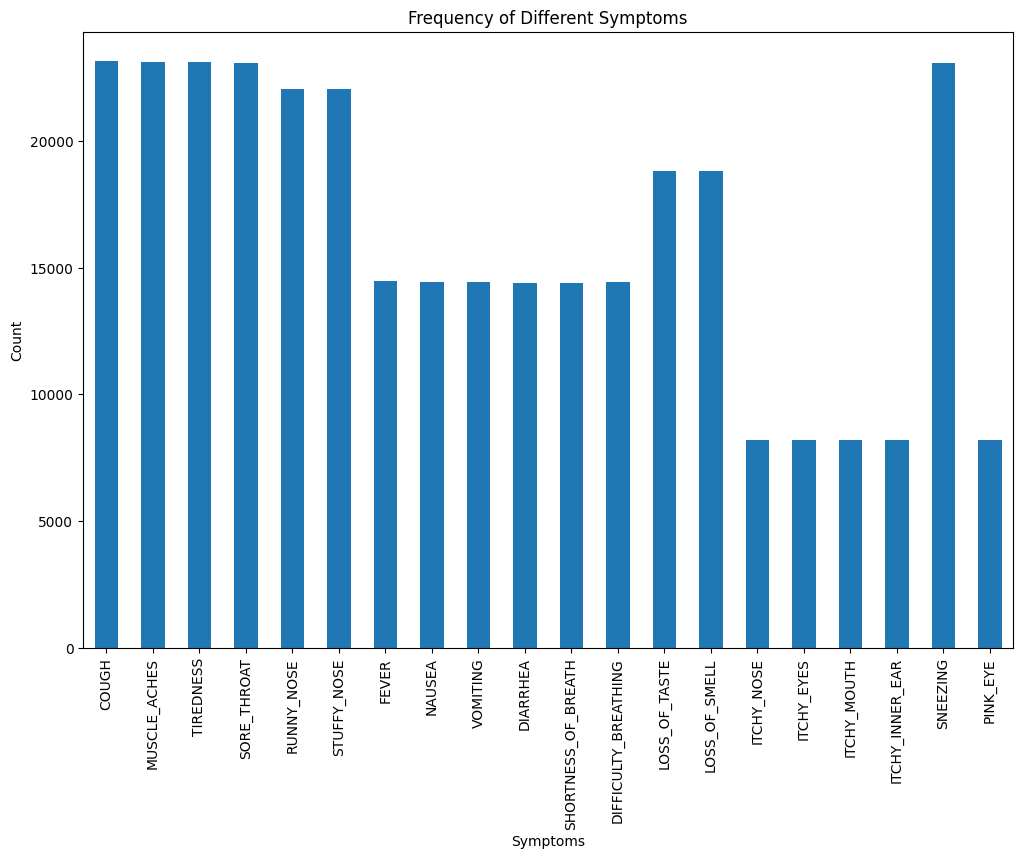

In [ ]:
symptom_columns = data.columns[:-1]  # All columns except 'TYPE'

# Plot
plt.figure(figsize=(12, 8))
data[symptom_columns].sum().plot(kind='bar')
plt.title('Frequency of Different Symptoms')
plt.ylabel('Count')
plt.xlabel('Symptoms')
plt.xticks(rotation=90)
plt.show()

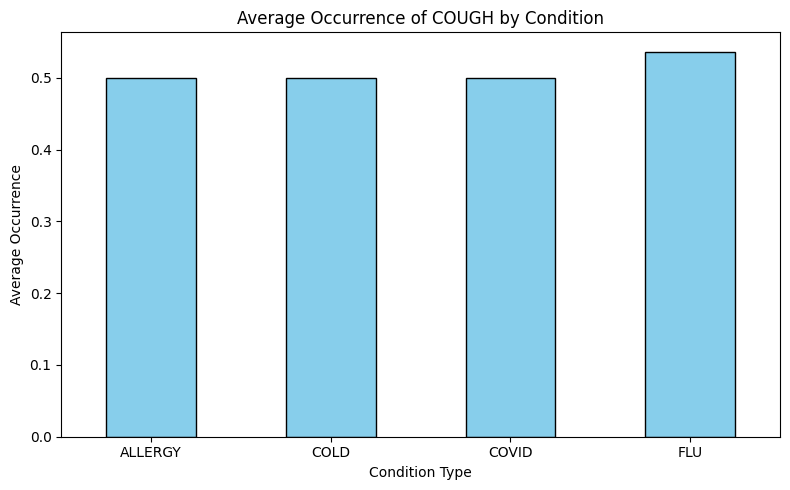

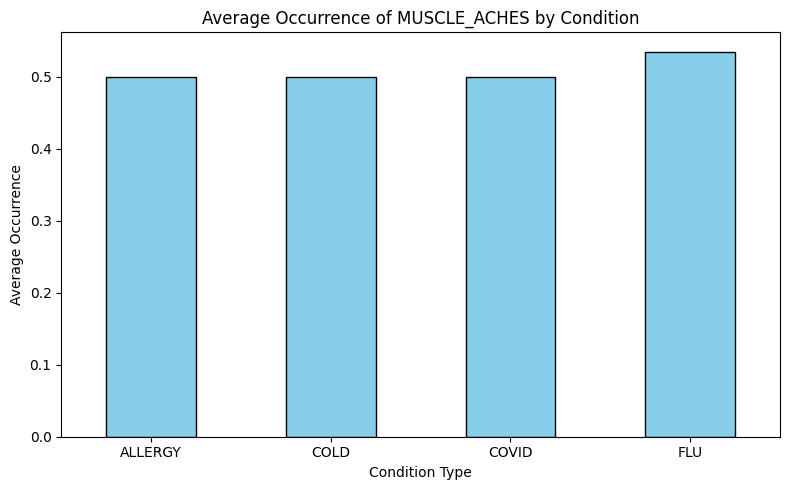

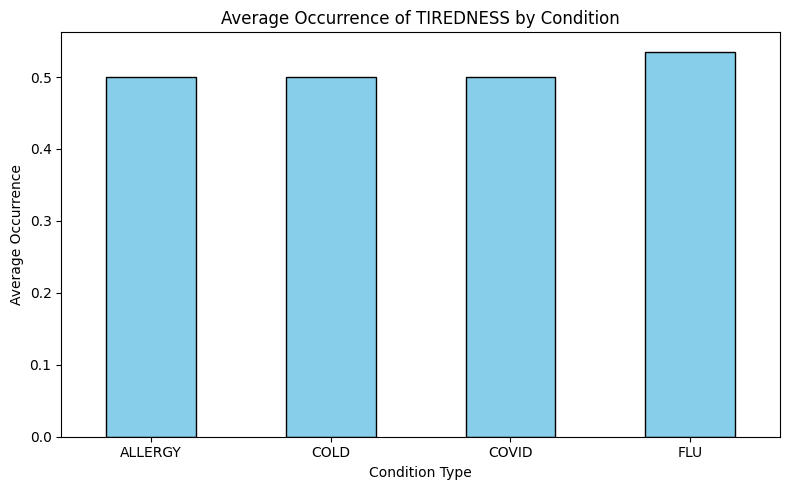

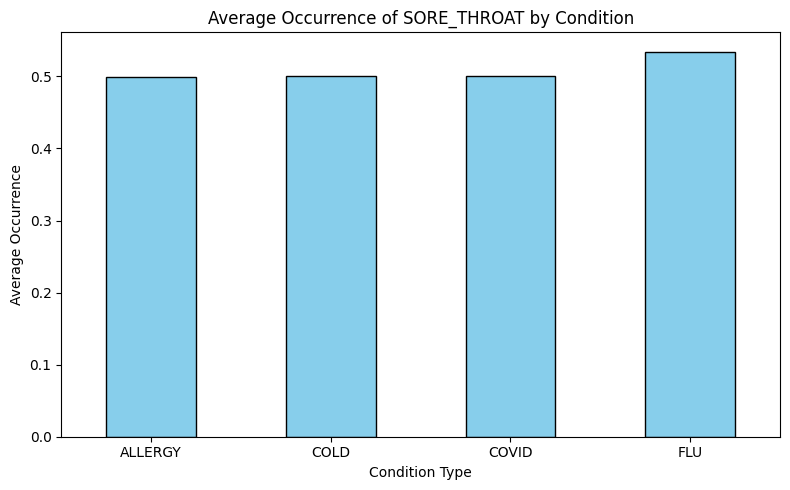

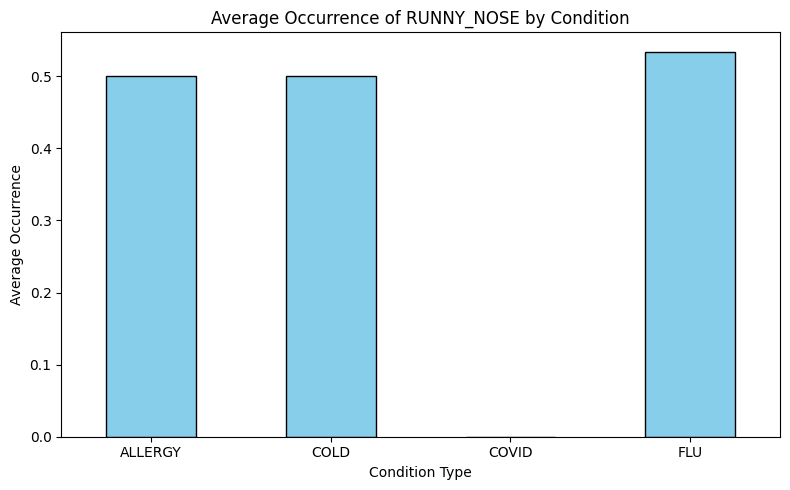

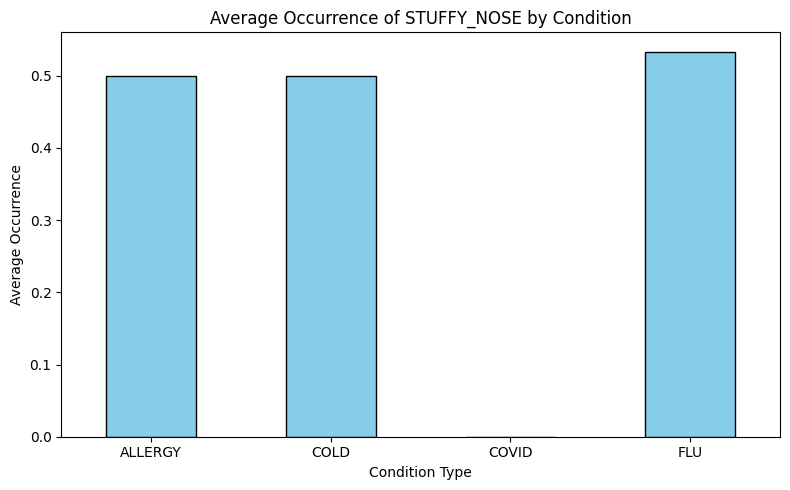

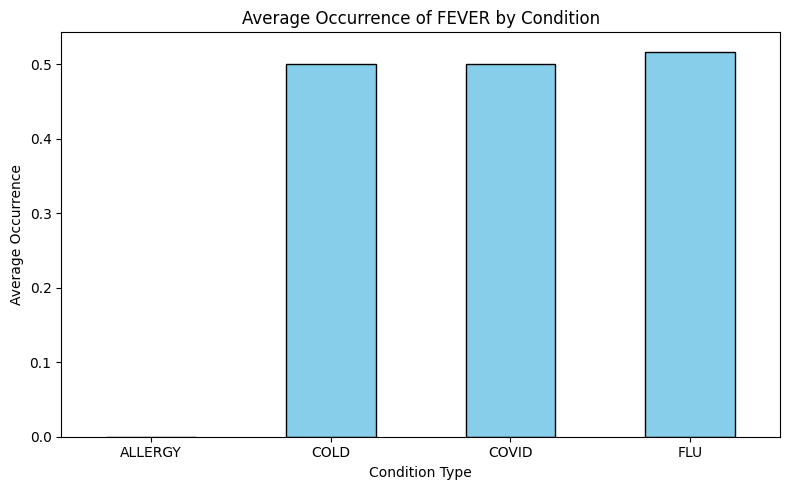

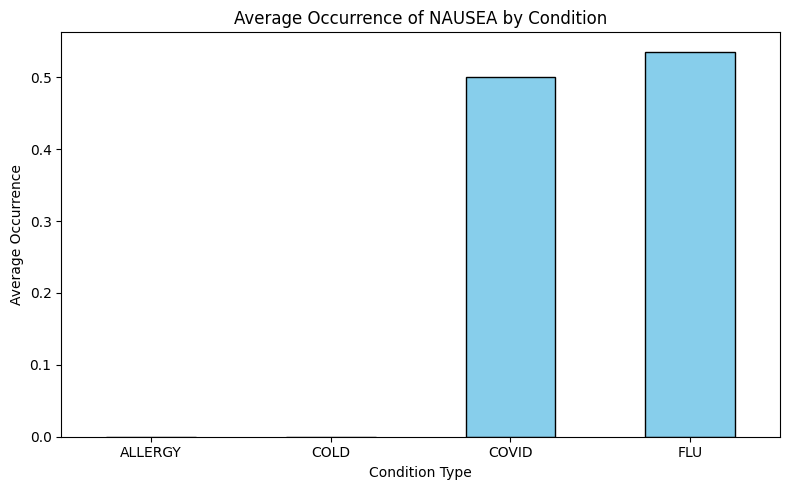

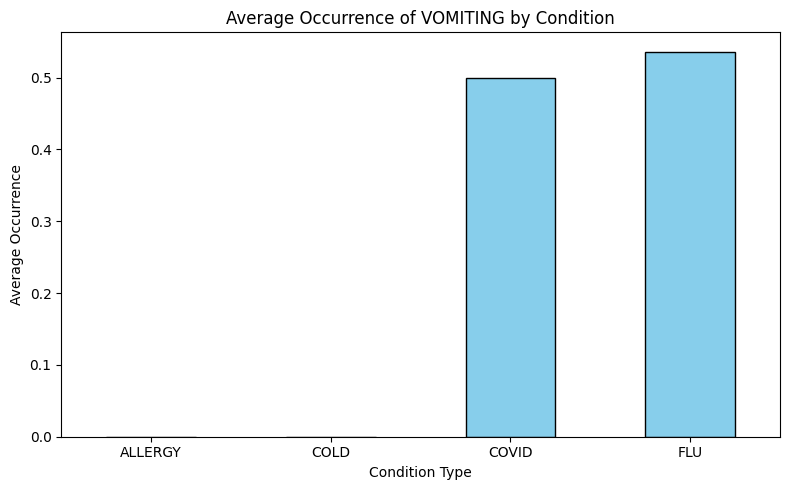

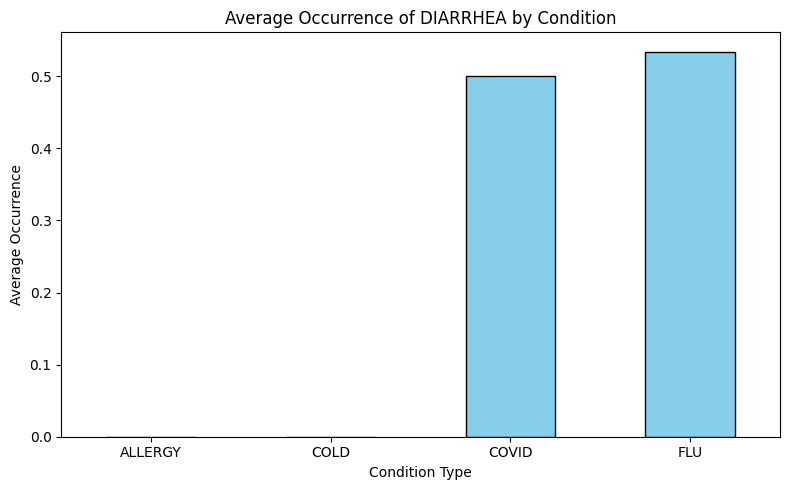

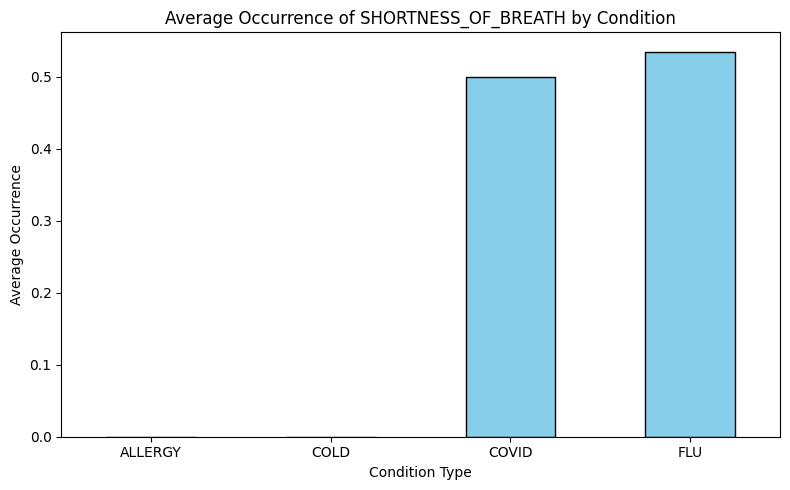

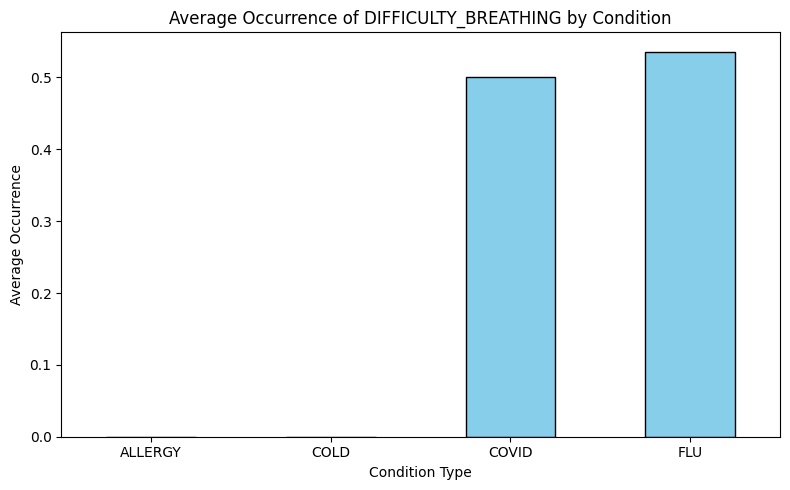

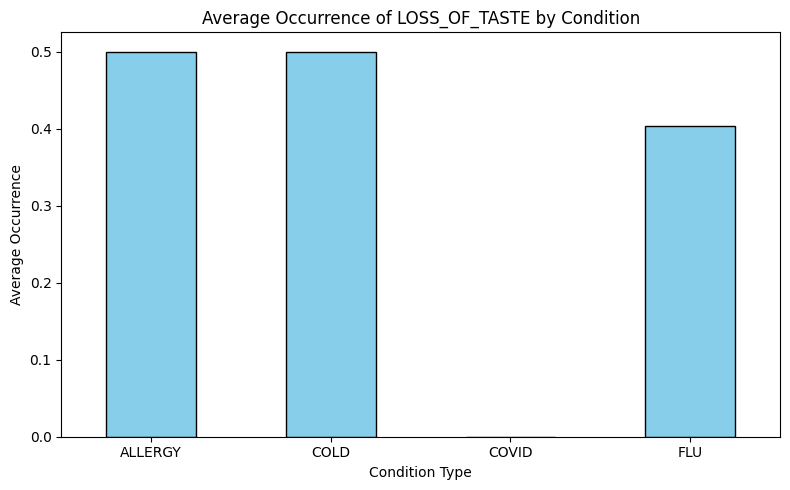

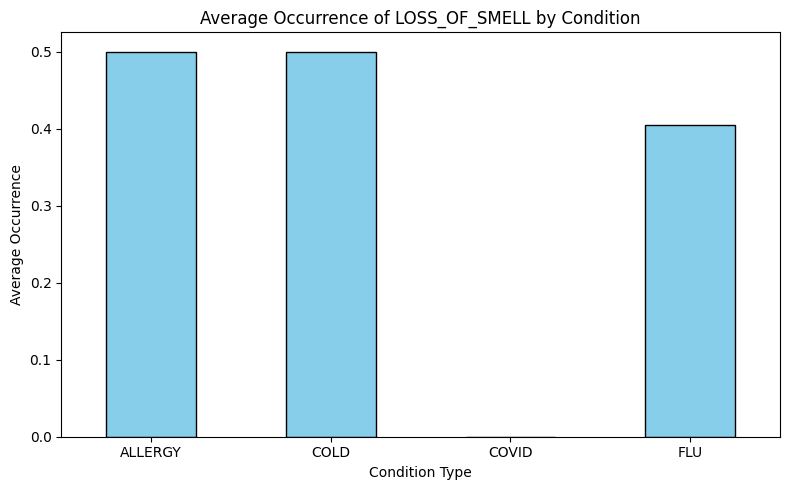

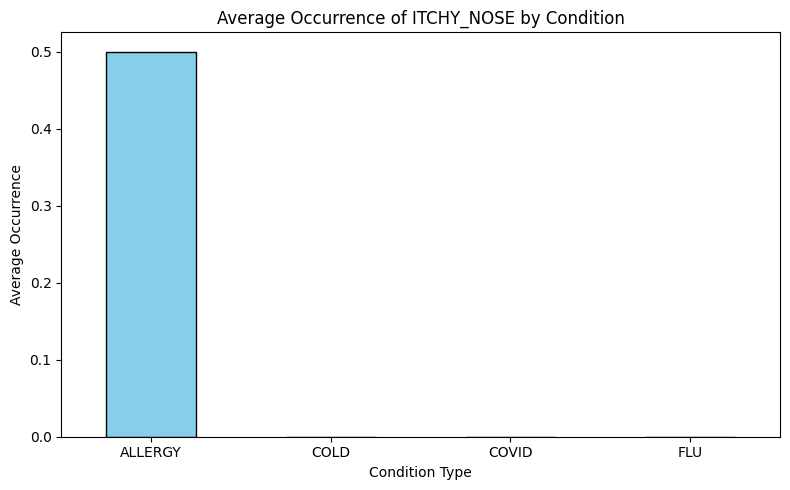

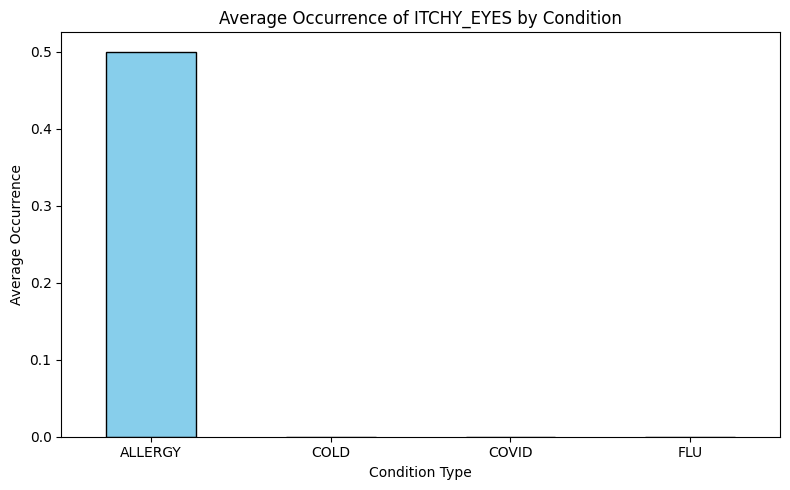

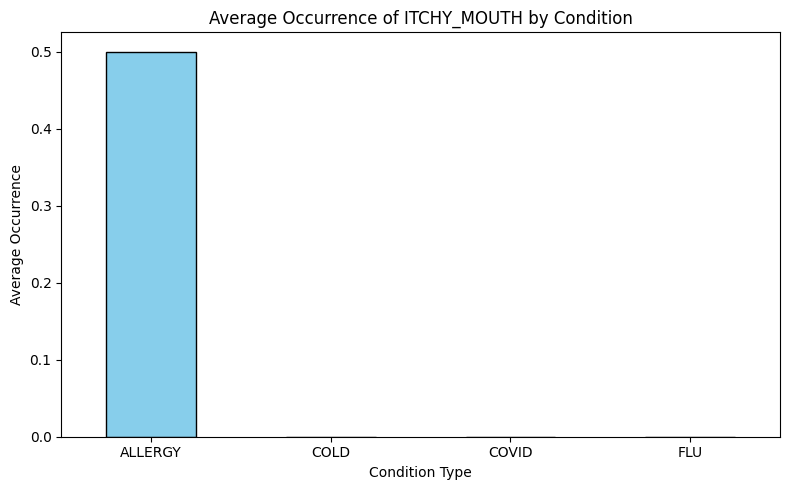

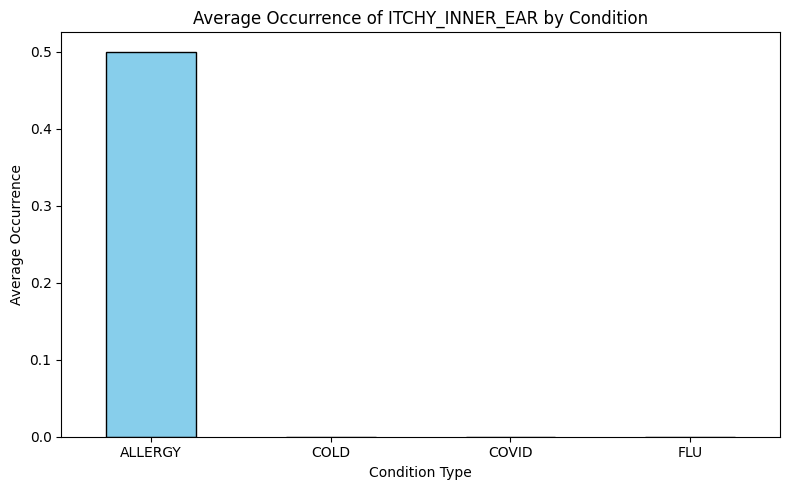

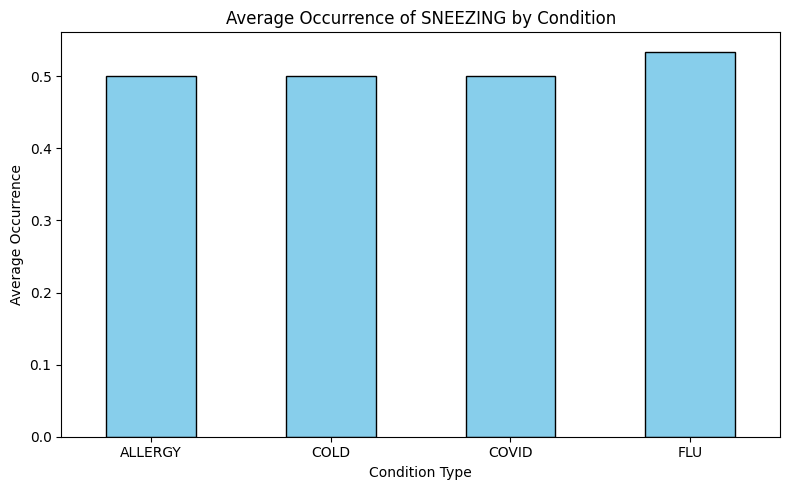

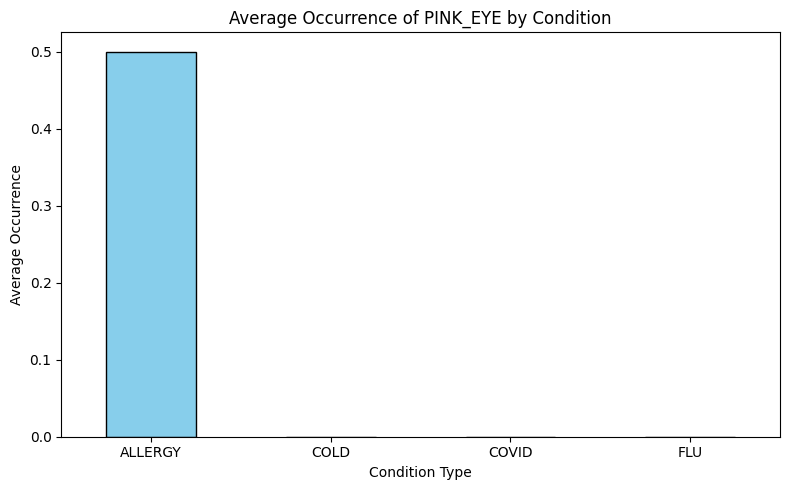

In [ ]:
import matplotlib.pyplot as plt

# Create visualizations for each column
for symptom in symptoms:
    plt.figure(figsize=(8, 5))
    data.groupby('TYPE')[symptom].mean().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Average Occurrence of {symptom} by Condition')
    plt.ylabel('Average Occurrence')
    plt.xlabel('Condition Type')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = data[symptom_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of Symptoms')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:
# 3. Pair Plot for pairwise relationships between symptoms
# We'll use a subset of symptoms to avoid overplotting
subset_symptoms = ['COUGH', 'FEVER', 'SNEEZING', 'ITCHY_NOSE', 'DIARRHEA']
sns.pairplot(data[subset_symptoms])
plt.show()

NameError: name 'sns' is not defined

In [ ]:
# 4. Count Plot for distribution of 'TYPE'
plt.figure(figsize=(8, 6))
sns.countplot(x='TYPE', data=data)
plt.title('Distribution of TYPE')
plt.show()


In [ ]:
# 5. Scatter Plots to visualize relationships between two specific symptoms
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NAUSEA', y='MUSCLE_ACHES', data=data)
plt.title('Scatter Plot of NAUSEA vs MUSCLE_ACHES')
plt.show()

In [ ]:
# 6. Violin Plots for showing the distribution and probability density of symptoms
plt.figure(figsize=(10, 6))
sns.violinplot(x='TYPE', y='COUGH', data=data)
plt.title('Violin Plot of COUGH across TYPE')
plt.show()

In [ ]:
# 7. Stacked Bar Plots for visualizing symptoms across TYPE categories
plt.figure(figsize=(12, 8))
pd.crosstab(data['TYPE'], data['COUGH']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of COUGH across TYPE')
plt.xlabel('TYPE')
plt.ylabel('Frequency')
plt.show()

In [ ]:

# 8. Pie Chart for proportions in the 'TYPE' column
type_distribution = data['TYPE'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_distribution, labels=type_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of TYPE categories')
plt.axis('equal')
plt.show()

# 9. Density Plot for probability density of symptom distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(data['COUGH'], label='COUGH', shade=True)
sns.kdeplot(data['FEVER'], label='FEVER', shade=True)
plt.title('Density Plot of COUGH and FEVER')
plt.legend()
plt.show()

In [ ]:
# 18. Word Cloud for the frequency of symptoms
from wordcloud import WordCloud
from pandas.plotting import parallel_coordinates
text = ' '.join(symptom for symptom in symptom_columns)
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Symptoms')
plt.show()

In [ ]:
# Step 2: Handle Missing Values
# Separate numerical and categorical columns

numerical_features = ['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE', 'STUFFY_NOSE', 'FEVER',
                      'NAUSEA', 'VOMITING', 'DIARRHEA', 'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
                      'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE']

categorical_features = ['TYPE']  # Assuming 'TYPE' is the only categorical feature
# Impute missing values for numerical data with the median
numerical_imputer = SimpleImputer(strategy='median')
data[numerical_features] = numerical_imputer.fit_transform(data[numerical_features])
# Impute missing values for categorical data with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])

In [ ]:
# Step 3: Normalize or Standardize Numerical Features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder to convert categorical 'TYPE' into numeric binary columns
encoder = OneHotEncoder(sparse_output=False)  # sparse_output is used instead of sparse
encoded_categorical_data = encoder.fit_transform(data[categorical_features])


In [ ]:
# Convert encoded data to DataFrame and merge it back
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))
data = data.drop(categorical_features, axis=1)
data = pd.concat([data, encoded_categorical_df], axis=1)

In [ ]:
# Prepare X and y for the model
X = data.drop(encoded_categorical_df.columns, axis=1)
y = encoded_categorical_df.values.argmax(axis=1)  # This gives classes like 0, 1, 2, etc. for TYPE
#Step 5: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#Check the distribution after applying SMOTE
print("Original dataset class distribution:\n", pd.Series(y).value_counts())
print("Resampled dataset class distribution:\n", pd.Series(y_resampled).value_counts())

Original dataset class distribution:
 3    25000
0    16381
2     2048
1     1024
Name: count, dtype: int64
Resampled dataset class distribution:
 0    25000
1    25000
2    25000
3    25000
Name: count, dtype: int64


In [ ]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

KNN Accuracy: 95.36%
Loss (1 - accuracy): 0.0464

Classification Report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4977
        COLD       0.93      0.99      0.96      5007
       COVID       0.90      0.98      0.94      4974
         FLU       1.00      0.88      0.93      5042

    accuracy                           0.95     20000
   macro avg       0.96      0.95      0.95     20000
weighted avg       0.96      0.95      0.95     20000


Confusion Matrix:
[[4829  146    2    0]
 [  16 4948   43    0]
 [   0   97 4877    0]
 [   0  101  523 4418]]


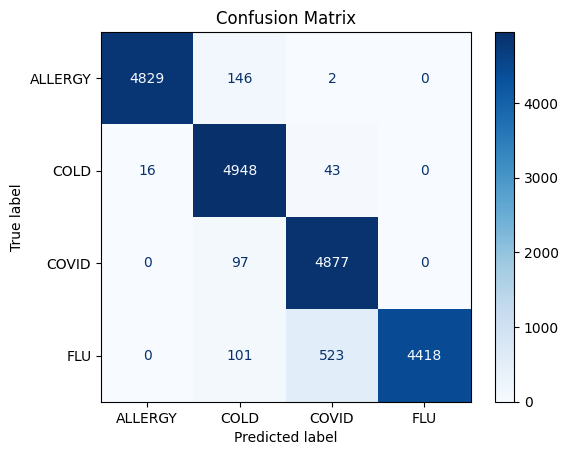

In [ ]:
# Step 7: Build KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 8: Model Evaluation
# Predict the test set
y_pred = knn.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")
# Compute loss as (1 - accuracy)
loss = 1 - accuracy
print(f"Loss (1 - accuracy): {loss:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.categories_[0])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



Random Forest Accuracy: 93.86%
Loss (1 - accuracy): 0.0614

Classification Report:
              precision    recall  f1-score   support

     ALLERGY       0.98      0.97      0.97      4977
        COLD       0.94      0.96      0.95      5007
       COVID       0.91      0.92      0.91      4974
         FLU       0.93      0.90      0.91      5042

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000


Confusion Matrix:
[[4830  138    3    6]
 [  93 4809   62   43]
 [   2   74 4588  310]
 [  18   76  402 4546]]


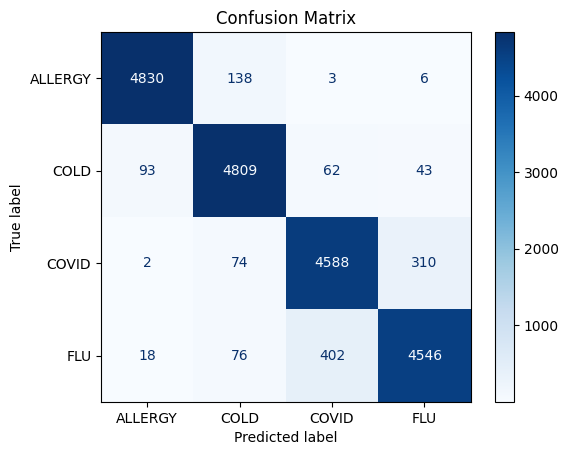

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Step 7: Build Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 8: Model Evaluation
# Predict the test set
y_pred = rf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
# Compute loss as (1 - accuracy)
loss = 1 - accuracy
print(f"Loss (1 - accuracy): {loss:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.categories_[0])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



SVM Accuracy: 96.02%
Loss (1 - accuracy): 0.0399

Classification Report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4977
        COLD       0.93      1.00      0.96      5007
       COVID       0.92      0.97      0.95      4974
         FLU       1.00      0.90      0.95      5042

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000


Confusion Matrix:
[[4829  148    0    0]
 [   0 5007    0    0]
 [   0  153 4821    0]
 [   0   96  400 4546]]


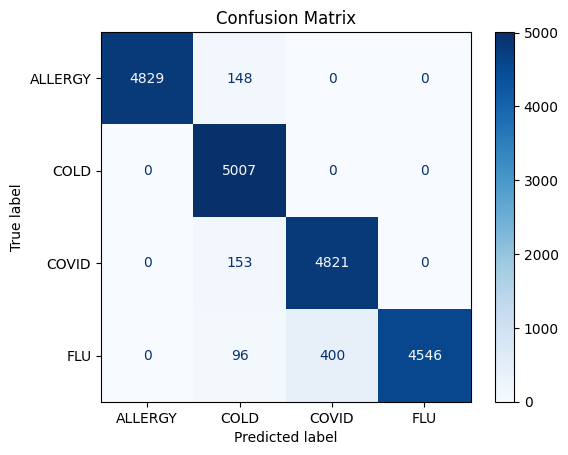

In [ ]:
from sklearn.svm import SVC
# Step 7: Build SVM Model
svm = SVC(probability=True, kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Step 8: Model Evaluation
# Predict the test set
y_pred = svm.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy * 100:.2f}%")
# Compute loss as (1 - accuracy)
loss = 1 - accuracy
print(f"Loss (1 - accuracy): {loss:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.categories_[0])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Naive Bayes Accuracy: 96.02%
Loss (1 - accuracy): 0.0399

Classification Report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4977
        COLD       0.93      1.00      0.96      5007
       COVID       0.92      0.97      0.95      4974
         FLU       1.00      0.90      0.95      5042

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000


Confusion Matrix:
[[4829  148    0    0]
 [   0 5007    0    0]
 [   0  153 4821    0]
 [   0   96  400 4546]]


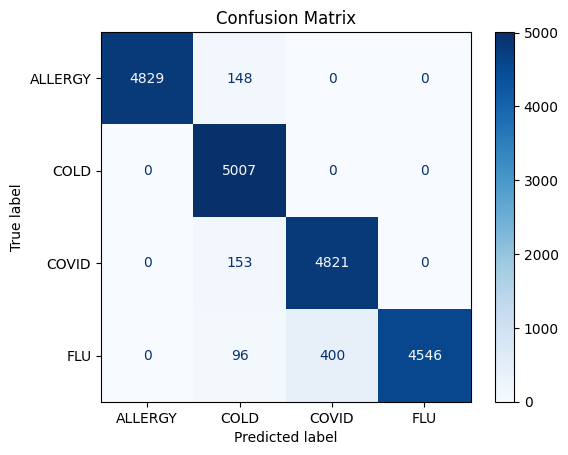

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Step 7: Build Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Step 8: Model Evaluation
# Predict the test set
y_pred = nb.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy * 100:.2f}%")
# Compute loss as (1 - accuracy)
loss = 1 - accuracy
print(f"Loss (1 - accuracy): {loss:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.categories_[0])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Logistic Regression Accuracy: 96.02%
Loss (1 - accuracy): 0.0399

Classification Report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4977
        COLD       0.93      1.00      0.96      5007
       COVID       0.92      0.97      0.95      4974
         FLU       1.00      0.90      0.95      5042

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000


Confusion Matrix:
[[4829  148    0    0]
 [   0 5007    0    0]
 [   0  153 4821    0]
 [   0   96  400 4546]]


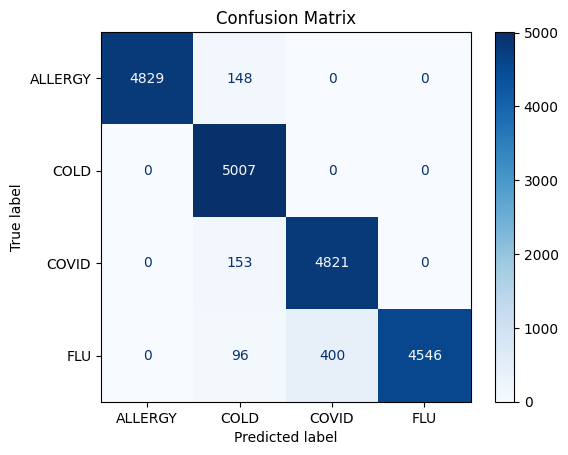

In [ ]:
from sklearn.linear_model import LogisticRegression
# Step 7: Build Logistic Regression Model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Step 8: Model Evaluation
# Predict the test set
y_pred = lr.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
# Compute loss as (1 - accuracy)
loss = 1 - accuracy
print(f"Loss (1 - accuracy): {loss:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.categories_[0])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Voting Classifier Accuracy: 96.20%

Classification Report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4977
        COLD       0.94      1.00      0.97      5007
       COVID       0.92      0.98      0.95      4974
         FLU       1.00      0.90      0.95      5042

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000


Confusion Matrix:
[[4829  146    2    0]
 [   0 4987   20    0]
 [   0   96 4878    0]
 [   0   95  401 4546]]


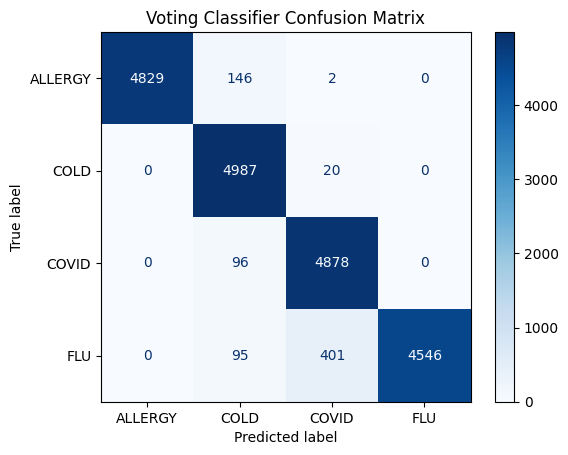

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Step 7: Define individual models
log_clf = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svc_clf = SVC(probability=True, random_state=42)

# Step 8: Build Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('log_clf', log_clf),
    ('rf_clf', rf_clf),
    ('svc_clf', svc_clf)
], voting='soft')

voting_clf.fit(X_train, y_train)

# Step 9: Model Evaluation
# Predict the test set
y_pred = voting_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.categories_[0])
disp.plot(cmap=plt.cm.Blues)
plt.title("Voting Classifier Confusion Matrix")
plt.show()